In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv('/content/AirPassengers.csv')
dataset = dataset['#Passengers']
dataset = np.array(dataset).reshape(-1,1)

In [6]:
dataset

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

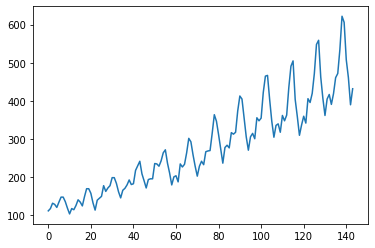

In [7]:
plt.plot(dataset)

In [8]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
dataset

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [9]:
train_size = 100
test_size = 44

In [10]:
train = dataset[0:train_size, :]
train.shape

(100, 1)

In [11]:
test = dataset[train_size:len(dataset), :]
test.shape

(44, 1)

In [16]:
def get_data(dataset, look_back):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i+look_back, 0])
  return np.array(dataX), np.array(dataY)


In [65]:
look_back = 1
x_train, y_train = get_data(train, look_back)
x_test, y_test = get_data(test, look_back)
x_train.shape, y_train.shape
x_test.shape, y_test.shape

((42, 1), (42,))

In [66]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [67]:
model = Sequential()
model.add(LSTM(units=5, input_shape=(1,1)))
model.add(Dense(1))

In [68]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [69]:
history = model.fit(x_train, y_train, epochs=50, verbose=1,batch_size=1)

Epoch 1/50
98/98 [==============================] - 1s 2ms/step - loss: 0.0367
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 5/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0111
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 8/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 9/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 10/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 11/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 12/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 13/50
98/98 [==============================

In [70]:
y_pred

array([[228.69662],
       [234.13643],
       [237.45955],
       [237.61082],
       [232.70593],
       [228.02638],
       [224.43776],
       [227.09776],
       [227.43639],
       [225.56088],
       [229.27953],
       [228.11041],
       [229.36253],
       [235.15518],
       [239.40346],
       [240.4296 ],
       [232.70593],
       [229.03014],
       [224.87102],
       [227.18251],
       [229.11333],
       [227.60529],
       [232.86601],
       [232.06277],
       [233.97862],
       [237.9878 ],
       [243.49036],
       [244.25124],
       [237.30794],
       [232.94594],
       [229.27953],
       [232.78601],
       [233.74138],
       [231.65852],
       [233.89961],
       [237.15608],
       [237.9878 ],
       [242.5795 ],
       [248.43541],
       [247.40073],
       [240.64758],
       [237.15608]], dtype=float32)

In [71]:
y_pred = model.predict(x_test)

In [72]:
y_pred = scaler.inverse_transform(y_pred)

In [73]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

In [74]:
y_pred

array([[350.28683],
       [414.89676],
       [455.55902],
       [457.4298 ],
       [397.65918],
       [342.51138],
       [301.63995],
       [331.8105 ],
       [335.70273],
       [314.28967],
       [357.08377],
       [343.48367],
       [358.05414],
       [427.27286],
       [479.7183 ],
       [492.57434],
       [397.65918],
       [354.17166],
       [306.50403],
       [332.78366],
       [355.1425 ],
       [337.6484 ],
       [399.5798 ],
       [389.96472],
       [412.98706],
       [462.09805],
       [531.3194 ],
       [541.03876],
       [453.68628],
       [400.53967],
       [357.08377],
       [398.6197 ],
       [410.11978],
       [385.14636],
       [412.03165],
       [451.81158],
       [462.09805],
       [519.7291 ],
       [595.061  ],
       [581.6153 ],
       [495.31445],
       [451.81158]], dtype=float32)

In [75]:
y_test

array([[422.],
       [465.],
       [467.],
       [404.],
       [347.],
       [305.],
       [336.],
       [340.],
       [318.],
       [362.],
       [348.],
       [363.],
       [435.],
       [491.],
       [505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.],
       [606.],
       [508.],
       [461.],
       [390.]])

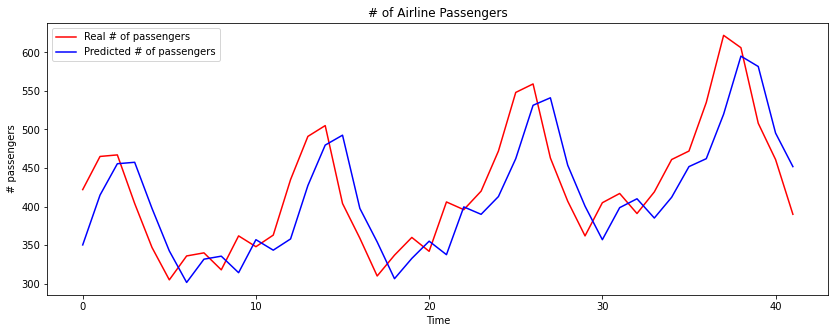

In [76]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color='red',label='Real # of passengers')
plt.plot(y_pred, color ='blue', label = 'Predicted # of passengers')
plt.title('# of Airline Passengers')
plt.xlabel('Time')
plt.ylabel('# passengers')
plt.legend()
plt.show()